# Lab 5.03 - Two-sample t-test

In [62]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

## Exercise 3 - effect of computer skills training

The managing partner of a major consulting firm is trying to assess the effectiveness of expensive computer skills training given to all new entry-level professionals. In an effort to make such an assessment, 
she administers a computer skills test immediately before and after the training program to each of 40 randomly chosen employees. The pretraining and 
posttraining scores of these 40 individuals are recorded. 

1. Do the given sample data support the claim at the 5% significance level that the organization's training program is increasing the new 
employee's working knowledge of computing? First make a boxplot
2. Calculate Cohen's *d* to know the effect size
3. There are many alternatives to Cohen's *d*. One of those alternatives is Glass' Δ
$$\Delta = \frac{|\overline{x}_1 - \overline{x}_2|}{s_1}$$
Glass's delta is defined as the mean difference between the experimental and control group divided by the standard deviation of the control group. Calculate Glass's delta.


A few results
1. pvalue = 2.2653e-09 < 0.05 => the training program is increasing the new employees's working knowledge of computing
2. Cohen's *d* = 1.619: very large effect size
3. Glass's delta = 1.241

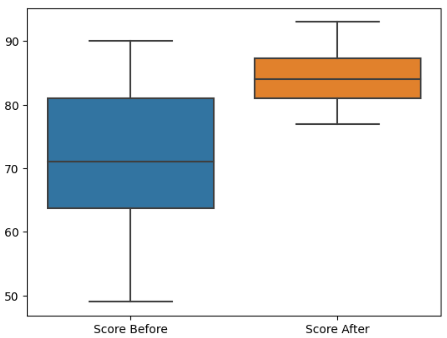


In [63]:
computer_skills = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Computer%20Skills.csv', delimiter=';').set_index('Employee' \
'')
computer_skills.head()

,Score Before,Score After
Employee,,
1,84,84
2,66,85
3,84,87
4,57,84
5,67,88


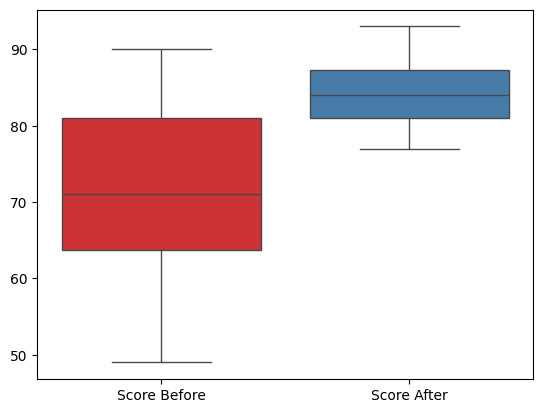

In [64]:
sns.boxplot(data=computer_skills,palette='Set1');


In [ ]:
result = stats.ttest_rel(computer_skills['Score Before'],computer_skills['Score After'],alternative='less')

print("T-statistic =", result.statistic, ", p-value =", result.pvalue)

if result.pvalue < 0.05:
    print("Since p < 0.05, we reject the null hypothesis: Score before are significantly lower than scores after.")
else:
    print("Since p ≥ 0.05, we do not reject the null hypothesis: no significant difference between scores before and scores after.")

T-statistic = -7.494583135258961 , p-value = 2.2653242936330844e-09
Since p < 0.05, we reject the null hypothesis: Score before are significantly lower than scores after.


In [66]:
def cohen_d(a, b):
    na = len(a)
    nb = len(b)
    pooled_sd = np.sqrt( ((na-1) * a.std(ddof=1)**2 +
                          (nb-1) * b.std(ddof=1)**2) / (na + nb - 2) )
    return (b.mean() - a.mean()) / pooled_sd

cohend = cohen_d(computer_skills['Score Before'],computer_skills['Score After'])

print("Cohen's d: ",cohend)

# Interpretation thresholds
if cohend < 0.01:
    interpretation = "Negligible"
elif cohend < 0.2:
    interpretation = "Very small"
elif cohend < 0.5:
    interpretation = "Small"
elif cohend < 0.8:
    interpretation = "Average"
elif cohend < 1.2:
    interpretation = "Large"
elif cohend < 2.0:
    interpretation = "Very large"
else:
    interpretation = "Huge"

print(f"-> {interpretation} effect size")

Cohen's d:  1.61935192361693
-> Very large effect size
